Project SP500 Stocks

Dataset: 5 years SP500 Stocks:
header: date    open    high    low     close   volume  Name
GICS has sector information


In [81]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import date
from datetime import timedelta
from datetime import datetime
%matplotlib inline

In [82]:
spdf=pd.read_csv("all_stocks_5yr.csv")

In [83]:
spdf=spdf.rename(columns={"Name":"name"})
#spdf.head()

In [84]:
secdf=pd.read_csv("sp500SectorStocks.csv")
secdf=secdf.rename(columns={"TickerSymbol":"name"})
secdf.head(3)

,name,Security,SECfilings,GICSsector,GICSsubSector,Location,DateFirstAdded,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)


In [85]:
# remove spdf and secdf white space in left and right handsides for some columns
spdf["name"]=spdf["name"].str.strip()
spdf["date"]=spdf["date"].str.strip()
secdf["name"]=secdf["name"].str.strip()
secdf["GICSsector"]=secdf["GICSsector"].str.strip()


In [86]:
dtyear=[[x for x in re.split(r'-',i) if i.strip()][0] for i in spdf["date"]]
dtmonth=[[x for x in re.split(r'-',i) if i.strip()][1] for i in spdf["date"]]
dtday=[[x for x in re.split(r'-',i) if i.strip()][2] for i in spdf["date"]]
spdf["dtyear"]=dtyear
spdf["dtmonth"]=dtmonth
spdf["dtday"]=dtday
spdf.head()

,date,open,high,low,close,volume,name,dtyear,dtmonth,dtday
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,02,08
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,02,11
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,02,12
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,02,13
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,02,14


In [87]:
# Clean up Data
# (1) Remove Stocks data in 2018 only one month data in 2018
print("Before remove 2018 data, # of records: "+str(spdf.shape))
spdf=spdf[spdf["dtyear"]!="2018"]
print("After remove 2018 data, # of records: "+str(spdf.shape))

Before remove 2018 data, # of records: (619040, 10)
After remove 2018 data, # of records: (605910, 10)


In [88]:
spstxdf = pd.merge(spdf, secdf, on = 'name', how = 'left')
spstxdf.head()

,date,open,high,low,close,volume,name,dtyear,dtmonth,dtday,Security,SECfilings,GICSsector,GICSsubSector,Location,DateFirstAdded,CIK,Founded
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,02,08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201.0,1934
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,02,11,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201.0,1934
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013,02,12,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201.0,1934
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013,02,13,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201.0,1934
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013,02,14,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201.0,1934


In [89]:
lstsec=spstxdf.groupby("GICSsector").GICSsector.unique().keys().tolist()
print(lstsec)
print(lstsec[3])

['Communication Services', 'Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 'Health Care', 'Industrials', 'Information Technology', 'Materials', 'Real Estate', 'Utilities']
Energy


In [90]:
# Set start and end date of each year (2013~2017)
def getStarEndDates(yearIpt):
    spdfUniDate=spdf[spdf["dtyear"]==str(yearIpt)].groupby("date").date.unique()
    len1=len(spdfUniDate)
    if len1>1:
        return [spdfUniDate[0][0], spdfUniDate[len1-1][0]]
    elif len1==1:
        return [spdfUniDate[0][0], spdfUniDate[0][0]]
    else:
        return []

fiveyears=[str(2013+i) for i in range(5)]
startenddates={}
for y in fiveyears:
    tmp1=getStarEndDates(y)
    startenddates[y]=tmp1

print(startenddates)

{'2013': ['2013-02-08', '2013-12-31'], '2014': ['2014-01-02', '2014-12-31'], '2015': ['2015-01-02', '2015-12-31'], '2016': ['2016-01-04', '2016-12-30'], '2017': ['2017-01-03', '2017-12-29']}


In [91]:
# May discard, not needed/used
def getStarEndDatesByName(nameIpt, yearIpt):
    c1=spdf["dtyear"]==str(yearIpt)
    c2=spdf["name"]==nameIpt
    spdfUniDate=spdf[c1 & c2].groupby("date").date.unique()
    len1=len(spdfUniDate)
    if len1>1:
        return [spdfUniDate[0][0], spdfUniDate[len1-1][0]]
    elif len1==1:
        return [spdfUniDate[0][0], spdfUniDate[0][0]]
    else:
        return [] 
    
#test3=getStarEndDatesByName("ALLE","2013")
#print(test3)

In [92]:
# Clean Up Data
# (2) Remove Stocks without Sector
print("Before (2) Clean up: remove no sector stocks: num of records:"+str(spstxdf.shape))
spstxdf=spstxdf[pd.notnull(spstxdf["GICSsector"])]
print("After (2) Clean up: num of records:"+str(spstxdf.shape))

Before (2) Clean up: remove no sector stocks: num of records:(605910, 18)
After (2) Clean up: num of records:(583209, 18)


In [93]:
# Set the dictionary of all names (stock symbols)
namelst=["".join(x) for x in spstxdf.groupby("name").name.unique().tolist()]
print("len of names: "+str(len(namelst)))
spinfo={"name":namelst}
spinfodf=pd.DataFrame(spinfo)
# original 505 names, after remove the one without sector
# it's 485 names

len of names: 485


In [94]:
# Get each stock's each year gain/lost
# Set these info to names dictionary
numy=[0 for x in range(len(namelst))]
for (k,v) in startenddates.items():
    #tmp1=spdf[spdf["date"]==v[0]].sort_values(['name'],ascending=[1])
    #tmp2=spdf[spdf["date"]==v[1]].sort_values(['name'],ascending=[1])
    tmp1=spstxdf[spstxdf["date"]==v[0]].sort_values(['name'],ascending=[1])
    tmp2=spstxdf[spstxdf["date"]==v[1]].sort_values(['name'],ascending=[1])
    print("Number of SP500 Stocks in %s: %s" %(k,str(len(tmp1))))
    exprslt1 = pd.merge(spinfodf, tmp1, on = 'name', how = 'left')
    exprslt2 = pd.merge(spinfodf, tmp2, on = 'name', how = 'left')            
    spinfo["sector"]=exprslt1["GICSsector"].tolist()
    spinfo["sdate"+k]=exprslt1["date"].tolist()
    spinfo["sopen"+k]=exprslt1["open"].tolist()
    if k=="2013":
        spinfo["fdclose"+k]=exprslt1["close"].tolist()
    spinfo["sopen"+k+"vol"]=exprslt1["volume"].tolist()
    #spinfo["svol"+k]=exprslt1["volumn"].tolist()
    spinfo["edate"+k]=exprslt2["date"].tolist()
    spinfo["eclose"+k]=exprslt2["close"].tolist()
    spinfo["eclose"+k+"vol"]=exprslt2["volume"].tolist()
    #spinfo["evol"+k]=exprslt2["volumn"].tolist()
    
    spinfo["pdiff"+k]=((exprslt2["close"]*100-exprslt1["open"]*100)/100).tolist()
    spinfo["pdiff"+k+"pct"]=((exprslt2["close"]*100-exprslt1["open"]*100)/exprslt1["open"]).tolist()
    
    # round up at gain/lost price/percentage
    spinfo["pdiff"+k]=list(np.around(np.array(spinfo["pdiff"+k]),2)) 
    spinfo["pdiff"+k+"pct"]=list(np.around(np.array(spinfo["pdiff"+k+"pct"]),2)) 

Number of SP500 Stocks in 2013: 459
Number of SP500 Stocks in 2014: 466
Number of SP500 Stocks in 2015: 471
Number of SP500 Stocks in 2016: 476
Number of SP500 Stocks in 2017: 479


In [95]:
# Clean up Data
# (3.1) Remove stocks with only partial year 2017 data in spinfodf(spinfo)

spinfodf=pd.DataFrame(spinfo)
print("Before (3.1.1) remove partial 2017 data: num of records spinfodf:"+str(spinfodf.shape))
print("Before (3.1.2) remove partial 2017 data: num of records spinfo:"+str(len(spinfo["name"])))
discardNames=spinfodf[spinfodf["sdate2017"].isna()]
spinfodf=spinfodf[spinfodf["sdate2017"].notna()]
print("After (3.1.1) remove partial 2017 data: num of records spinfodf:"+str(spinfodf.shape))
#print(spinfodf.head())

spinfo=spinfodf.to_dict()
print("After (3.1.2) remove partial 2017 data: num of records spinfo:"+str(len(spinfo["name"])))
n1=discardNames["name"].tolist()

#print(discardNames["name"])
print(n1)


Before (3.1.1) remove partial 2017 data: num of records spinfodf:(485, 43)
Before (3.1.2) remove partial 2017 data: num of records spinfo:485
After (3.1.1) remove partial 2017 data: num of records spinfodf:(479, 43)
After (3.1.2) remove partial 2017 data: num of records spinfo:479
['APTV', 'BHF', 'BHGE', 'DWDP', 'DXC', 'HLT']


In [96]:
# Clean up Data
# (3.2) Remove stocks with only partial year 2017 data in spstxdf

print("before (3.1): spstxdf size: "+str(spstxdf.shape))
spstxdf=spstxdf[~spstxdf["name"].isin(n1)]
print("after (3.2): spstxdf size: "+str(spstxdf.shape))

before (3.1): spstxdf size: (583209, 18)
after (3.2): spstxdf size: (582426, 18)


In [97]:
# Set stock info with continued 5 years (2013-2017) info
print("check 1:"+str(spinfodf.shape))
spinfo5YCdf=spinfodf
print("before clean up non-continued 5 year data: spinfo5YCdf size: "+str(spinfo5YCdf.shape))
for (k,v) in startenddates.items():
    #tmpyrpf=spinfodf[spinfodf["sdate"+k].notna() & spinfodf["edate"+k].notna()].sort_values(["pdiff"+k+"pct"],ascending=[0])
    spinfo5YCdf=spinfo5YCdf[spinfo5YCdf["sdate"+k].notna() & spinfo5YCdf["edate"+k].notna()]
    #print(tmpyrpf.head(5))
    #print("==============================")
    #print(spinfo5YCdf.head(5))
print("after clean up non-continued 5 year data: spinfo5YCdf size: "+str(spinfo5YCdf.shape))
print("check 2:"+str(spinfodf.shape)+" , is check 1 = check 2")

check 1:(479, 43)
before clean up non-continued 5 year data: spinfo5YCdf size: (479, 43)
after clean up non-continued 5 year data: spinfo5YCdf size: (459, 43)
check 2:(479, 43) , is check 1 = check 2


In [98]:
# maybe more clean up later
# remove stocks year data if has started and ended date of that year, 
# but missing data in that year

In [99]:
# Set up price diff, and diff percentage for 5 year continued stocks in sp500
tmp1=((spinfo5YCdf["eclose2017"]*100-spinfo5YCdf["sopen2013"]*100)/100).tolist()
tmp2=((spinfo5YCdf["eclose2017"]*100-spinfo5YCdf["sopen2013"]*100)/(spinfo5YCdf["sopen2013"])).tolist()
spinfo5YCdf["yc5"]=list(np.around(np.array(tmp1),2)) 
spinfo5YCdf["yc5pct"]=list(np.around(np.array(tmp2),2))
tmp3=spinfo5YCdf["fdclose2013"]*spinfo5YCdf["sopen2013vol"]
sum3=tmp3.sum()
tmp3=((tmp3*100)/sum3).tolist()
tmp4=spinfo5YCdf["eclose2017"]*spinfo5YCdf["eclose2017vol"]
sum4=tmp4.sum()
tmp4=((tmp4*100)/sum4).tolist()
spinfo5YCdf["2013mktwvpct"]=list(np.around(np.array(tmp3),6)) 
spinfo5YCdf["2017mktwvpct"]=list(np.around(np.array(tmp4),6)) 
#print(spinfo5YCdf.head())
#print(spinfo5YCdf["yc5pct"].head())

In [100]:
# Drop un-needed columns in spinfo5YCdf (continued 5 year stock info)
#print(spinfo5YCdf.head())
print(spinfo5YCdf.shape)
cols = [col for col in spinfo5YCdf.columns if col in ['name', 'sector','sopen2013','sopen2013vol','eclose2017','eclose2017vol','yc5','yc5pct','2013mktwvpct','2017mktwvpct']]
spinfo5YCdf = spinfo5YCdf[cols]
spinfo5YCdf = spinfo5YCdf.sort_values(["yc5pct"],ascending=[0])
#print(spinfo5YCdf.shape)
print(spinfo5YCdf.head())
#spinfo5YCdf.drop([], axis=1)

(459, 47)
     name                  sector  sopen2013  sopen2013vol  eclose2017  \
334  NVDA  Information Technology    12.3700     7677336.0      193.50   
322  NFLX  Communication Services    25.9635    25649820.0      191.96   
52   AVGO  Information Technology    35.2800     3296565.0      256.90   
410   STZ        Consumer Staples    31.6200     4908434.0      228.57   
26   ALGN             Health Care    32.4000      872084.0      222.19   

     eclose2017vol     yc5   yc5pct  2013mktwvpct  2017mktwvpct  
334        6999116  181.13  1464.27      0.106868      1.533652  
322        5187606  166.00   639.35      0.746208      1.127666  
52         1798003  221.62   628.17      0.131024      0.523067  
410        1827874  196.95   622.87      0.175922      0.473117  
26          560243  189.79   585.77      0.032120      0.140963  


In [101]:
# Sectors Info
secinfodf=pd.DataFrame()
secpctinfodf=pd.DataFrame()
secinfodf["sector"]=lstsec
secpctinfodf["sector"]=lstsec
#print(secinfodf.head())
for (k,v) in startenddates.items():
    tmp1=spinfodf[spinfodf["sdate"+k].notna() & spinfodf["edate"+k].notna()]
    numrcd=len(tmp1)
    tmp1byg=tmp1.groupby("sector").eclose2017.count()
    tmp1bygpct=((tmp1byg*100)/numrcd).round(2)
    tmpdf1=pd.DataFrame(tmp1byg)
    tmpdf2=pd.DataFrame(tmp1bygpct)
    tt1=pd.merge(secinfodf, tmpdf1, on = 'sector', how = 'left')
    tt2=pd.merge(secinfodf, tmpdf2, on = 'sector', how = 'left')    
    secinfodf["y"+str(k)]=tt1["eclose2017"]
    secpctinfodf["y"+str(k)+"pct"]=tt2["eclose2017"]
#secpctinfodf=secinfodf
#secinfodf.drop(columns=['y2013pct','y2014pct','y2015pct','y2016pct','y2017pct'])
print(secinfodf.head(2))
print("\n")
print(secpctinfodf.head(2))
#secpctinfodf=secpctinfodf.transpose()
#print("\n\n")
#print(secpctinfodf.head(2))

                   sector  y2013  y2014  y2015  y2016  y2017
0  Communication Services     19     23     24     24     24
1  Consumer Discretionary     61     61     61     61     62


                   sector  y2013pct  y2014pct  y2015pct  y2016pct  y2017pct
0  Communication Services      4.14      4.94      5.10      5.04      5.01
1  Consumer Discretionary     13.29     13.09     12.95     12.82     12.94


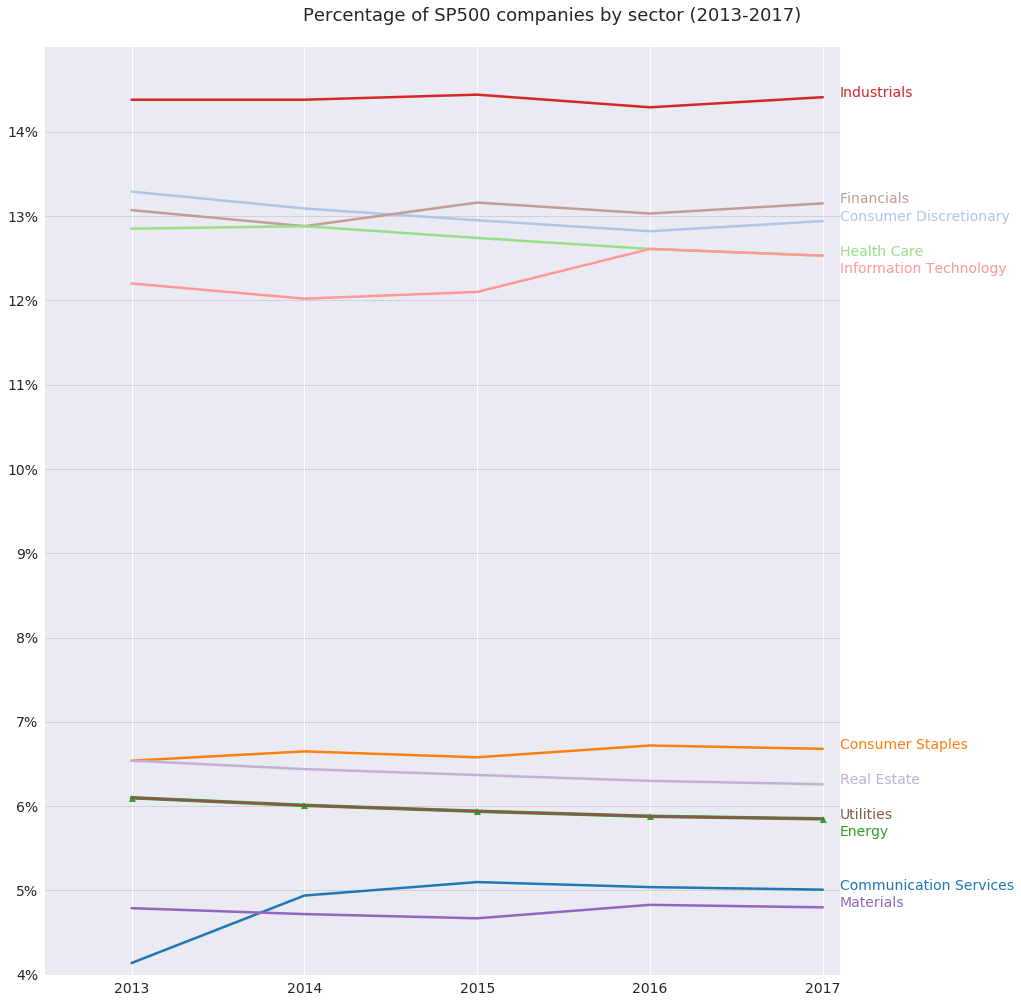

In [102]:
# Plot of Percentage of the company in SP500 by sector (2013-2017)
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#2ca02c', '#c49c94',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#ffbb78', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
fig, ax = plt.subplots(1, 1, figsize=(16, 14))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
ax.set_xlim(2012.5, 2017.1)
ax.set_ylim(4, 15)
plt.xticks(range(2013, 2018, 1), fontsize=14)
plt.yticks(range(4, 15, 1), fontsize=14)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)

for (i,x) in enumerate(lstsec):
    yd1=secpctinfodf[secpctinfodf["sector"]==x].values[0][1:]
    if x!="Energy":
        line = plt.plot([2013,2014,2015,2016,2017],
                    yd1,
                    lw=2.5,
                    color=color_sequence[i])
    else:
        line = plt.plot([2013,2014,2015,2016,2017],
                    yd1,
                    color=color_sequence[i],
                    marker='^',
                    lw=3.5)
    y_pos = yd1[-1]
    if x=="Information Technology" or x=="Energy":
        y_pos-=0.2
    x_pos=2017.1    
    plt.text(x_pos, y_pos,x, fontsize=14, color=color_sequence[i])
fig.suptitle('Percentage of SP500 companies by sector (2013-2017)\n', fontsize=18, ha='center')
plt.show()
fig.savefig('secPctEachY.png')

0:Communication Services
[ 0.8   0.16 -0.06 -0.03]
1:Consumer Discretionary
[-0.2  -0.14 -0.13  0.12]
2:Consumer Staples
[ 0.11 -0.07  0.14 -0.04]
3:Energy
[-0.09 -0.07 -0.06 -0.03]
4:Financials
[-0.19  0.28 -0.13  0.12]
5:Health Care
[ 0.03 -0.14 -0.13 -0.08]
6:Industrials
[ 0.    0.06 -0.15  0.12]
7:Information Technology
[-0.18  0.08  0.51 -0.08]
8:Materials
[-0.07 -0.05  0.16 -0.03]
9:Real Estate
[-0.1  -0.07 -0.07 -0.04]
10:Utilities
[-0.09 -0.07 -0.06 -0.03]


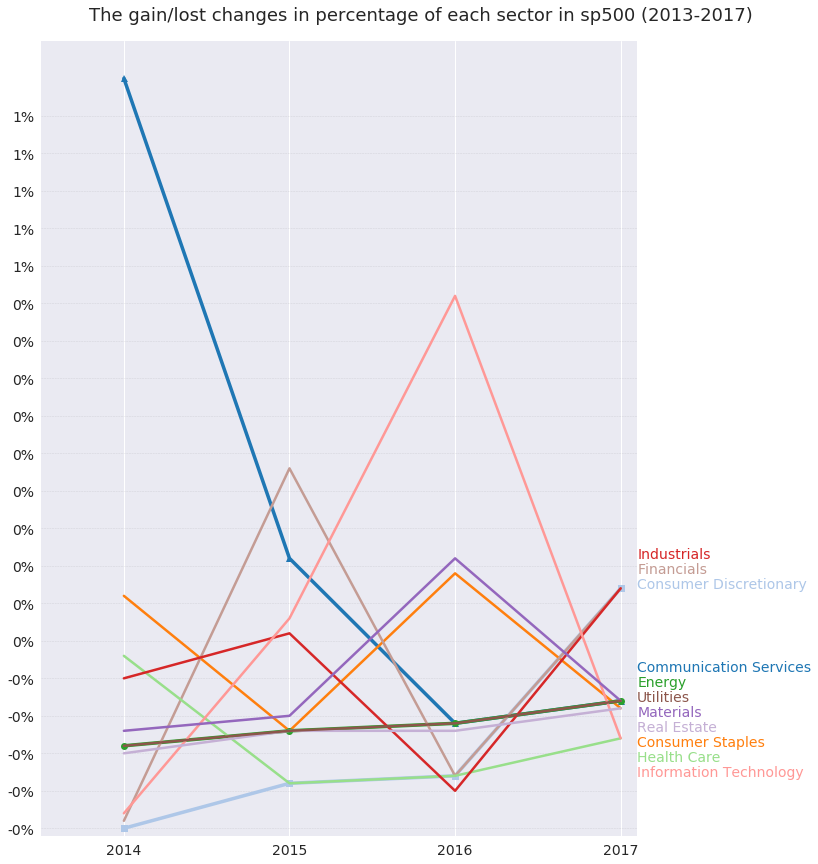

In [103]:
#needfixneedfix
# The gain/lost changes in percentage of each sector in sp500 (2013-2017)
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#2ca02c', '#c49c94',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#ffbb78', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Remove the plot frame lines. They are unnecessary here.
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
# Limit the range of the plot to only where the data is.
# Avoid unnecessary whitespace.
ax.set_xlim(2013.5, 2017.1)
ax.set_ylim(-0.21, 0.85)

# Make sure your axis ticks are large enough to be easily read.
# You don't want your viewers squinting to read your plot.
plt.xticks(range(2014, 2018, 1), fontsize=14)
#plt.yticks(np.arange(11),('-0.2','-0.1','0.0,'0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8'))
plt.yticks(np.arange(-0.2,0.8, step=0.05), fontsize=14)
ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.1)

# Remove the tick marks; they are unnecessary with the tick lines we just
# plotted.
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=True, left=False, right=False, labelleft=True)
y_offset=[0.04,0,-0.05,0.02,0.02,
          -0.03,0.04,-0.05,-0.02,-0.03,
          0]
for (i,x) in enumerate(lstsec):
    
    yd1=secpctinfodf[secpctinfodf["sector"]==x].values[0][1:]
    yd2=np.roll(yd1,-1)-secpctinfodf[secpctinfodf["sector"]==x].values[0][1:]
    yd2=np.round(list(yd2[0:4]),2)
    print(str(i)+":"+x)
    print(yd2)
    if x=="Consumer Discretionary":
        line = plt.plot([2014,2015,2016,2017],
                    yd2,
                    color=color_sequence[i],
                    marker='s',
                    lw=3.5)
    elif x=="Communication Services":
        line = plt.plot([2014,2015,2016,2017],
                    yd2,
                    color=color_sequence[i],
                    marker='^',
                    lw=3.5)
    elif x=="Energy":
        line = plt.plot([2014,2015,2016,2017],
                    yd2,
                    color=color_sequence[i],
                    marker='o',
                    lw=3.5)
    else:
        line = plt.plot([2014,2015,2016,2017],
                    yd2,
                    lw=2.5,
                    color=color_sequence[i])
        
    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = yd2[-1]+y_offset[i]
    #if x=="Information Technology" or x=="Energy":
    #    y_pos-=0.2
        
    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    plt.text(2017.1, y_pos, x, fontsize=14, color=color_sequence[i])

fig.suptitle('The gain/lost changes in percentage of each sector in sp500 (2013-2017)\n', fontsize=18, ha='center')
plt.show()
fig.savefig('secPctChangeEachY.png')

In [104]:
spstxdf.head(2)

,date,open,high,low,close,volume,name,dtyear,dtmonth,dtday,Security,SECfilings,GICSsector,GICSsubSector,Location,DateFirstAdded,CIK,Founded
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013,02,08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201.0,1934
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013,02,11,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201.0,1934


In [105]:
spinfodf.head(2)

,name,sector,sdate2013,sopen2013,fdclose2013,sopen2013vol,edate2013,eclose2013,eclose2013vol,pdiff2013,...,pdiff2016,pdiff2016pct,sdate2017,sopen2017,sopen2017vol,edate2017,eclose2017,eclose2017vol,pdiff2017,pdiff2017pct
0,A,Health Care,2013-02-08,45.07,45.08,1824755.0,2013-12-31,57.19,941447.0,12.12,...,4.5,10.96,2017-01-03,45.93,1739726.0,2017-12-29,66.97,1064895,21.04,45.81
1,AAL,Industrials,2013-02-08,15.07,14.75,8407500.0,2013-12-31,25.25,7168395.0,10.18,...,5.4,13.08,2017-01-03,47.28,6737752.0,2017-12-29,52.03,2697096,4.75,10.05


In [106]:
def getDateList(yipt):
    dlst1=spstxdf[spstxdf["dtyear"]==yipt].date.unique().tolist()
    return dlst1

#test1=getDateList("2013")
#print(len(test1))
#print(type(test1))
#print(test1[0:10])

In [107]:
def getSecComsInfo(yipt, secipt, ascipt):
    c1=spinfodf["sector"]==secipt
    c2=spinfodf["sdate"+yipt]==str(startenddates[yipt][0])
    c3=spinfodf["edate"+yipt]==str(startenddates[yipt][1])
    tmp=spinfodf[c1 & c2 & c3].sort_values(['pdiff'+yipt+'pct'],ascending=[ascipt])
    #print(tmp.head())
    return tmp

def getTop5ComNames(yipt, secipt):
    tmp1=getSecComsInfo(yipt,secipt,0)
    return tmp1["name"][:5].tolist()

def getBottom5ComNames(yipt, secipt):
    tmp1=getSecComsInfo(yipt,secipt,1)
    tmp2=tmp1["name"][:5].tolist()
    #tmp2=tmp1["name"][-5:].tolist()
    return tmp2

def getComYearlyChangesPct(yipt, nmipt):
    pct1=spinfodf[spinfodf['name']==nmipt]['pdiff'+yipt+'pct'].values
    return pct1[0]

#test1=getComYearlyChangesPct("2013","FB")
#print(test1)
#test2=getSecComsInfo("2013", "Communication Services")
#print(test2.head(2))
#test3=getTop5ComNames("2013", "Communication Services")
#print(test3)
#test4=getBottom5ComNames("2013", "Communication Services")
#print(test4)

In [108]:
import matplotlib.dates as mdates

In [109]:
yipt="2013"
secipt="Communication Services"
top5=getTop5ComNames(yipt,secipt)
bottom5=getBottom5ComNames(yipt,secipt)
yeardates=getDateList(yipt)
topnbottom5=top5+bottom5

In [110]:
ydts0=pd.DataFrame(yeardates)
ydts0[0]=pd.to_datetime(ydts0[0],format='%Y-%m-%d')
ydts1=list(ydts0[0])

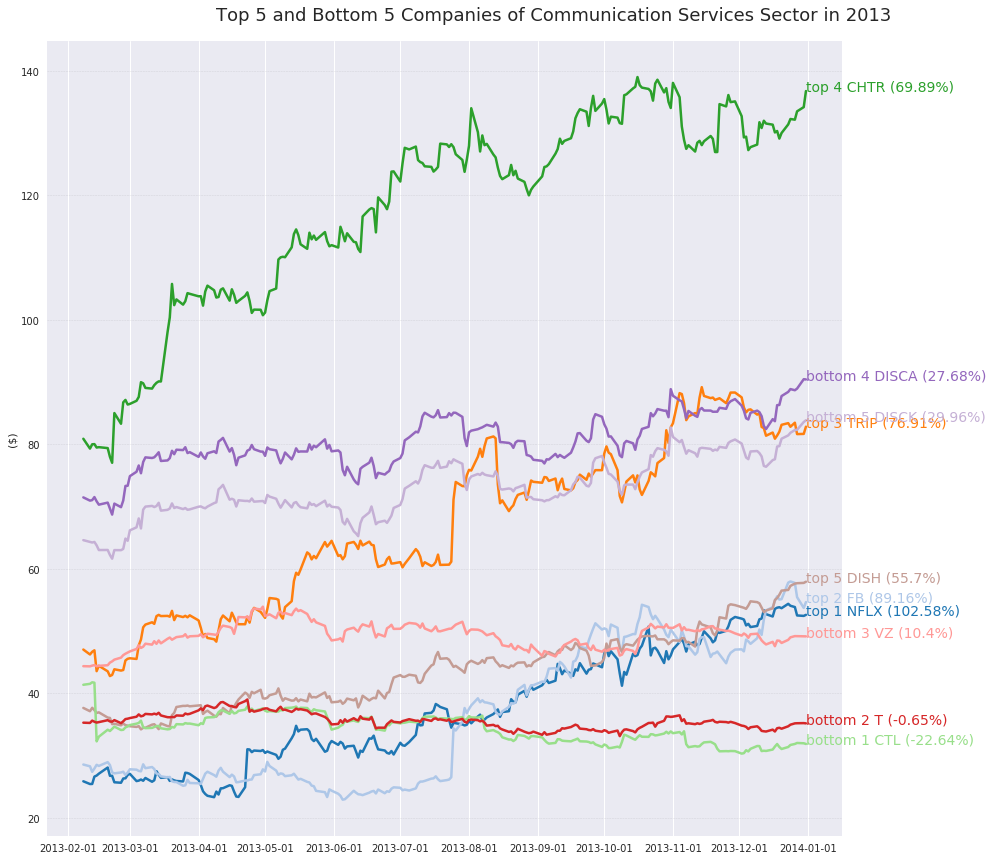

In [111]:
# draw year 2013, first sector: Communication Services
# then next todo: draw first sector, and 5 years each with continued 5 years
i=0
rank=0
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.1)
plt.tick_params(axis='both', which='both', bottom=True, top=False,
                labelbottom=True, left=True, right=False, labelleft=True)
offsets=[0,0,0,0,0,0,0,0,0,0,0]
plt.ylabel('($)')
#topnbottom5=topnbottom5[0:2] # debug only
for (idx0,nm) in enumerate(topnbottom5):
    c1=spstxdf["name"]==nm
    c2=spstxdf["dtyear"]==yipt
    yd1=spstxdf[c1 & c2]
    yd2=yd1["close"].tolist()    
    line = plt.plot(ydts1,
                    yd2,
                    lw=2.5,
                    color=color_sequence[i])
    y_pos = yd2[-1]
    x_pos= yeardates[len(yeardates)-1]
    pct1=getComYearlyChangesPct(yipt,nm)
    if idx0<5:
        lbl0 = "top "+str(rank+1)+" "+nm+" ("+str(pct1)+"%)"
    else:
        lbl0 = "bottom "+str(rank+1)+" "+nm+" ("+str(pct1)+"%)"
    plt.text(x_pos, y_pos, lbl0, fontsize=14, color=color_sequence[i])
    i+=1
    rank+=1
    if rank==5:
        rank=0
fig.suptitle('Top 5 and Bottom 5 Companies of '+secipt+' Sector in '+yipt+'\n', fontsize=18, ha='center')
plt.show()
fig.savefig('topNbtmComSrv2013.png')

In [112]:
dateslst=[]
for (yipt,d) in startenddates.items():
    dateslst.extend(getDateList(yipt))
    #print(len(dateslst))
#print("---------------------------")
#print(len(dateslst))
ydts3=pd.DataFrame(dateslst)
#print(ydts3.shape)
ydts3[0]=pd.to_datetime(ydts3[0],format='%Y-%m-%d')
ydts4=list(ydts3[0])
#print(ydts4)

In [113]:
topn=11
topssp=spinfo5YCdf.sort_values("yc5pct",ascending=[0])['name'][:topn].tolist()
print(topssp)
top1spsec=[]
for s in lstsec:
    top1spsec.append("".join(spinfo5YCdf[spinfo5YCdf["sector"]==s].sort_values("yc5pct",ascending=[0])['name'][:1]))
print("======================================================================")
print(top1spsec)
#print("======================================================================")

['NVDA', 'NFLX', 'AVGO', 'STZ', 'ALGN', 'EA', 'FB', 'LUV', 'MU', 'INCY', 'HII']
['NFLX', 'AMZN', 'STZ', 'VLO', 'ETFC', 'ALGN', 'LUV', 'NVDA', 'PKG', 'SBAC', 'AWK']


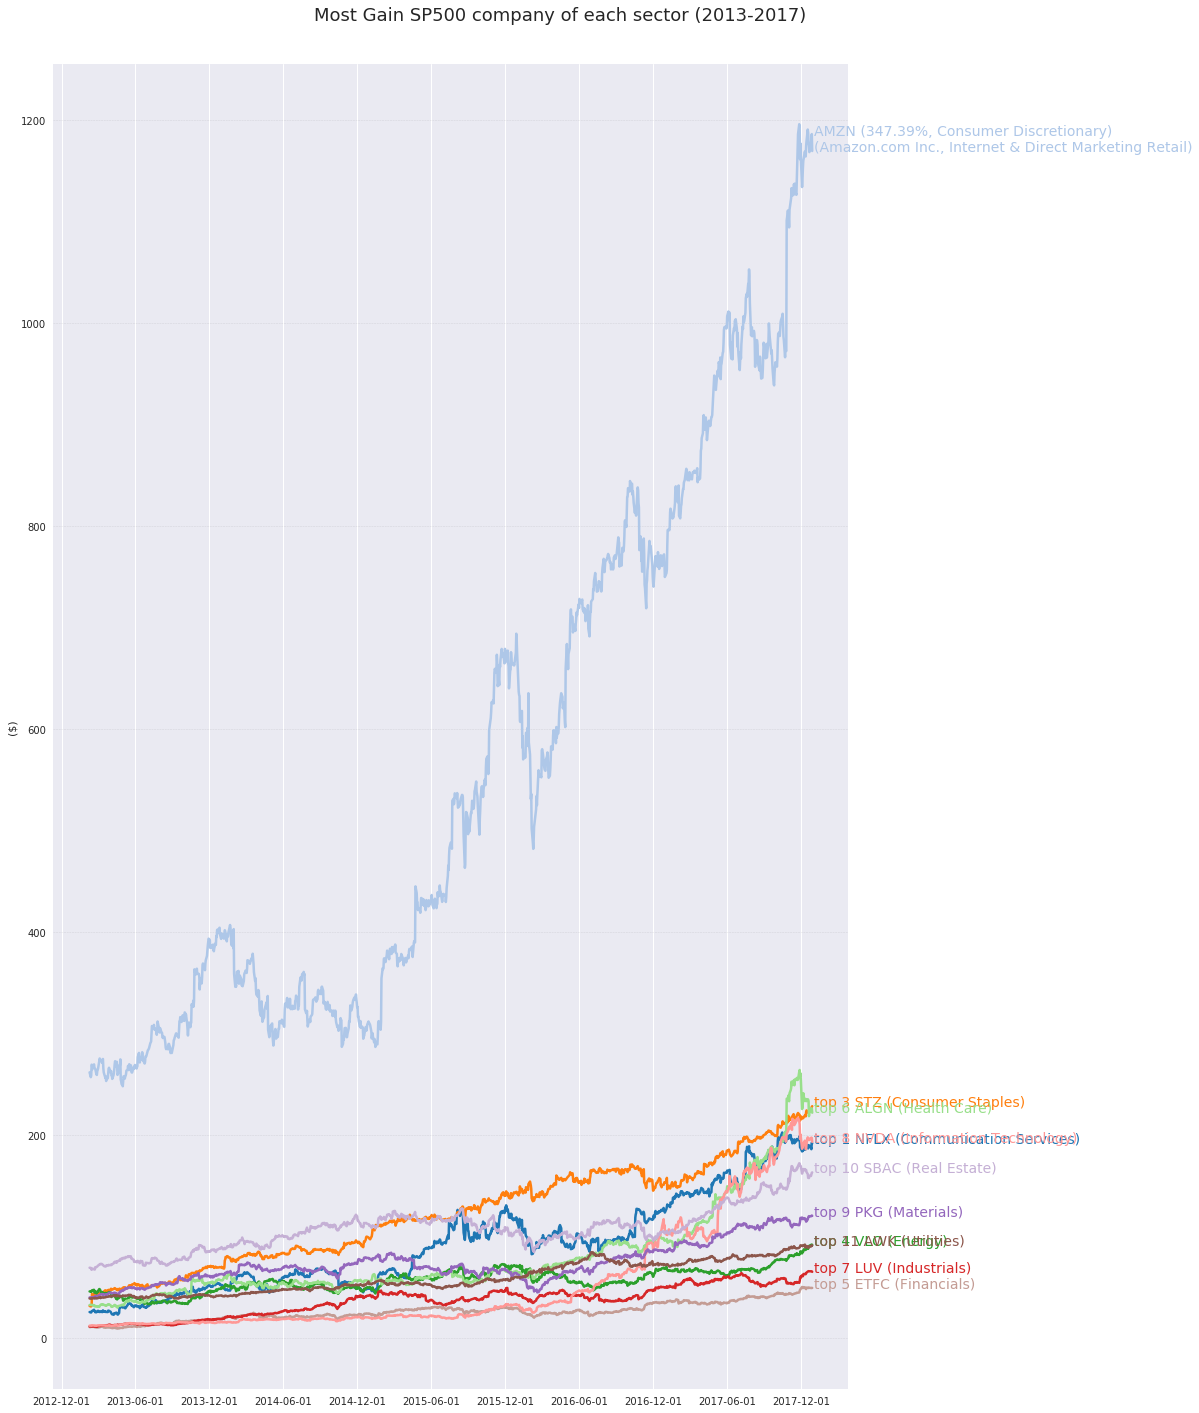

In [114]:
# Draw Most Gain SP500 company of each sector (2013-2017)
i=0
rank=0
fig, ax = plt.subplots(1, 1, figsize=(16, 20))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.1)
plt.tick_params(axis='both', which='both', bottom=True, top=False,
                labelbottom=True, left=True, right=False, labelleft=True)
plt.ylabel('($)')
for (rk0,nm) in enumerate(top1spsec):
    tpinfo0=spstxdf[spstxdf["name"]==nm]
    stkcrds=tpinfo0.sort_values("date",ascending=[1])['close'].tolist()
    secnm=tpinfo0["GICSsector"][:1].tolist()
    line = plt.plot(ydts4,
                    stkcrds,
                    lw=2.5,
                    color=color_sequence[rk0])
    y_pos = stkcrds[-1]
    x_pos=pd.to_datetime('2018-01-02', format='%Y-%m-%d')
    if rk0!=1:
        lbl0 = "top "+str(rk0+1)+" "+nm+" ("+secnm[0]+")"
    else:
        gainpct0=spinfo5YCdf[spinfo5YCdf["name"]==nm]["yc5pct"].tolist()
        comNm=tpinfo0["Security"][:1].tolist()
        subSec=tpinfo0["GICSsubSector"][:1].tolist()
        lbl0 = nm+" ("+str(gainpct0[0])+"%, "+secnm[0]+")\n("+comNm[0]+", "+subSec[0]+")"
    plt.text(x_pos, y_pos, lbl0, fontsize=14, color=color_sequence[rk0])
fig.suptitle('Most Gain SP500 company of each sector (2013-2017)\n', fontsize=18, ha='center')
plt.show()
fig.savefig('EachSecMostGainIn5Yrs.png')

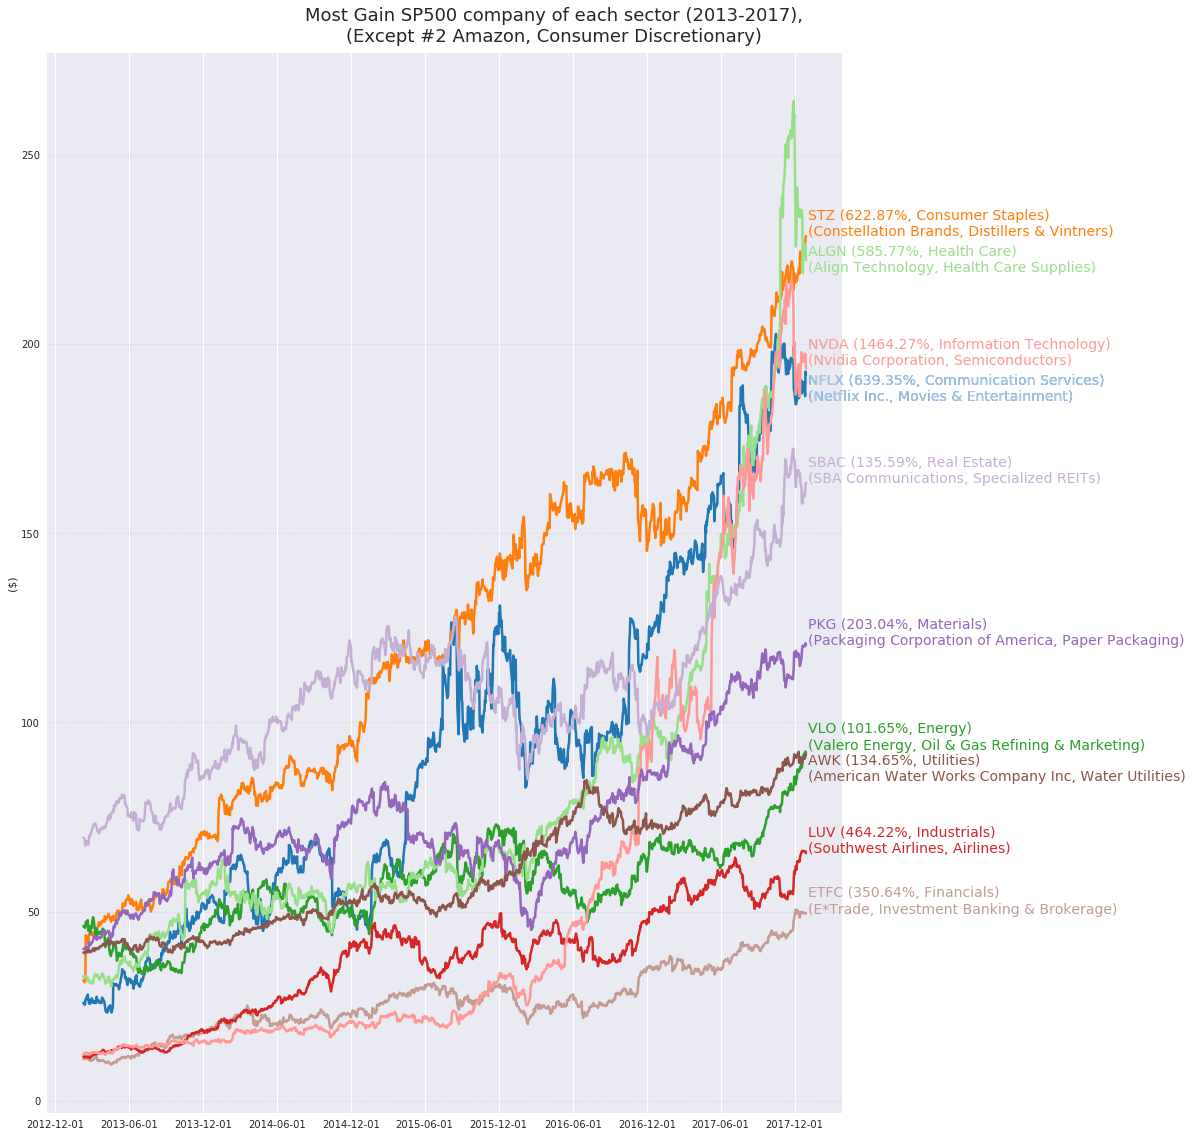

In [115]:
# Re-draw Most Gain SP500 company of each sector (2013-2017), #2 Amazon Consumer Discretionary
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
offsets=[-7,0,0,1,0,-3,0,1,0,0,-7]
fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.1)
plt.tick_params(axis='both', which='both', bottom=True, top=False,
                labelbottom=True, left=True, right=False, labelleft=True)
plt.ylabel('($)')
for (rk0,nm) in enumerate(top1spsec):
    if rk0!=1:
        tpinfo0=spstxdf[spstxdf["name"]==nm]
        stkcrds=tpinfo0.sort_values("date",ascending=[1])['close'].tolist()
        secnm=tpinfo0["GICSsector"][:1].tolist()
        #secnm=spstxdf[spstxdf["name"]==nm]["GICSsector"][:1].tolist()
        line = plt.plot(ydts4,
                        stkcrds,
                        lw=2.5,
                        color=color_sequence[rk0])
        y_pos = stkcrds[-1]+offsets[rk0]
        x_pos= pd.to_datetime('2018-01-02', format='%Y-%m-%d')
        gainpct0=spinfo5YCdf[spinfo5YCdf["name"]==nm]["yc5pct"].tolist()
        comNm=tpinfo0["Security"][:1].tolist()
        subSec=tpinfo0["GICSsubSector"][:1].tolist()
        lbl0 = nm+" ("+str(gainpct0[0])+"%, "+secnm[0]+")\n("+comNm[0]+", "+subSec[0]+")"
    plt.text(x_pos, y_pos, lbl0, fontsize=14, color=color_sequence[rk0])
    
fig.suptitle('Most Gain SP500 company of each sector (2013-2017),\n(Except #2 Amazon, Consumer Discretionary)\n', fontsize=18, ha='center')
plt.show()
fig.savefig('EachSecMostGainIn5Yrs-2.png')

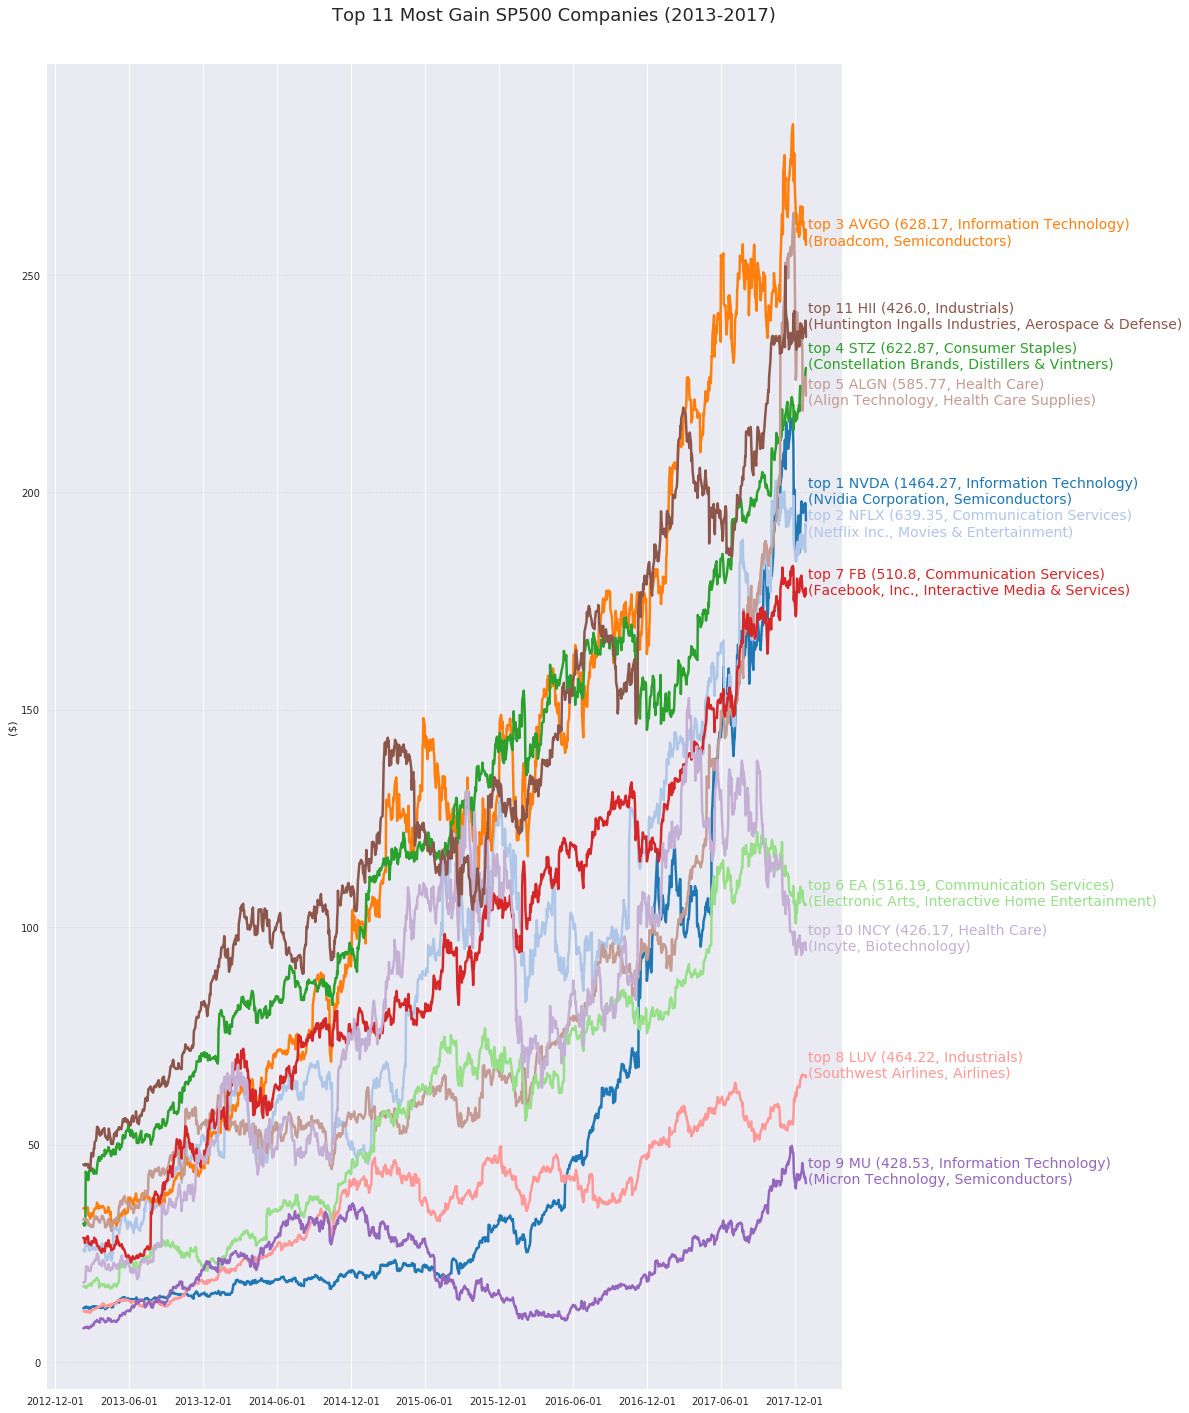

In [116]:
# Draw Top 11 Most Gain SP500 Companies (2013-2017)
fig, ax = plt.subplots(1, 1, figsize=(16, 20))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
offsets=[4,-2,0,0,-2,0,0,0,0,0,2]
fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.1)
plt.tick_params(axis='both', which='both', bottom=True, top=False,
                labelbottom=True, left=True, right=False, labelleft=True)
plt.ylabel('($)')
for (rk0,nm) in enumerate(topssp):
    stkcrds=spstxdf[spstxdf["name"]==nm].sort_values("date",ascending=[1])['close'].tolist()
    tpinfo0=spstxdf[spstxdf["name"]==nm]
    secnm=tpinfo0["GICSsector"][:1].tolist()
    #secnm=spstxdf[spstxdf["name"]==nm]["GICSsector"][:1].tolist()
    line = plt.plot(ydts4,
                    stkcrds,
                    lw=2.5,
                    color=color_sequence[rk0])
    y_pos = stkcrds[-1]+offsets[rk0]
    x_pos= pd.to_datetime('2018-01-02', format='%Y-%m-%d')
    gainpct0=spinfo5YCdf[spinfo5YCdf["name"]==nm]["yc5pct"].tolist()
    comNm=tpinfo0["Security"][:1].tolist()
    subSec=tpinfo0["GICSsubSector"][:1].tolist()
    lbl0 = "top "+str(rk0+1)+" "+nm+" ("+str(gainpct0[0])+", "+secnm[0]+")\n("+comNm[0]+", "+subSec[0]+")"
    plt.text(x_pos, y_pos, lbl0, fontsize=14, color=color_sequence[rk0])
    
fig.suptitle('Top 11 Most Gain SP500 Companies (2013-2017)\n', fontsize=18, ha='center')
plt.show()
fig.savefig('top11MostGainSPcom.png')

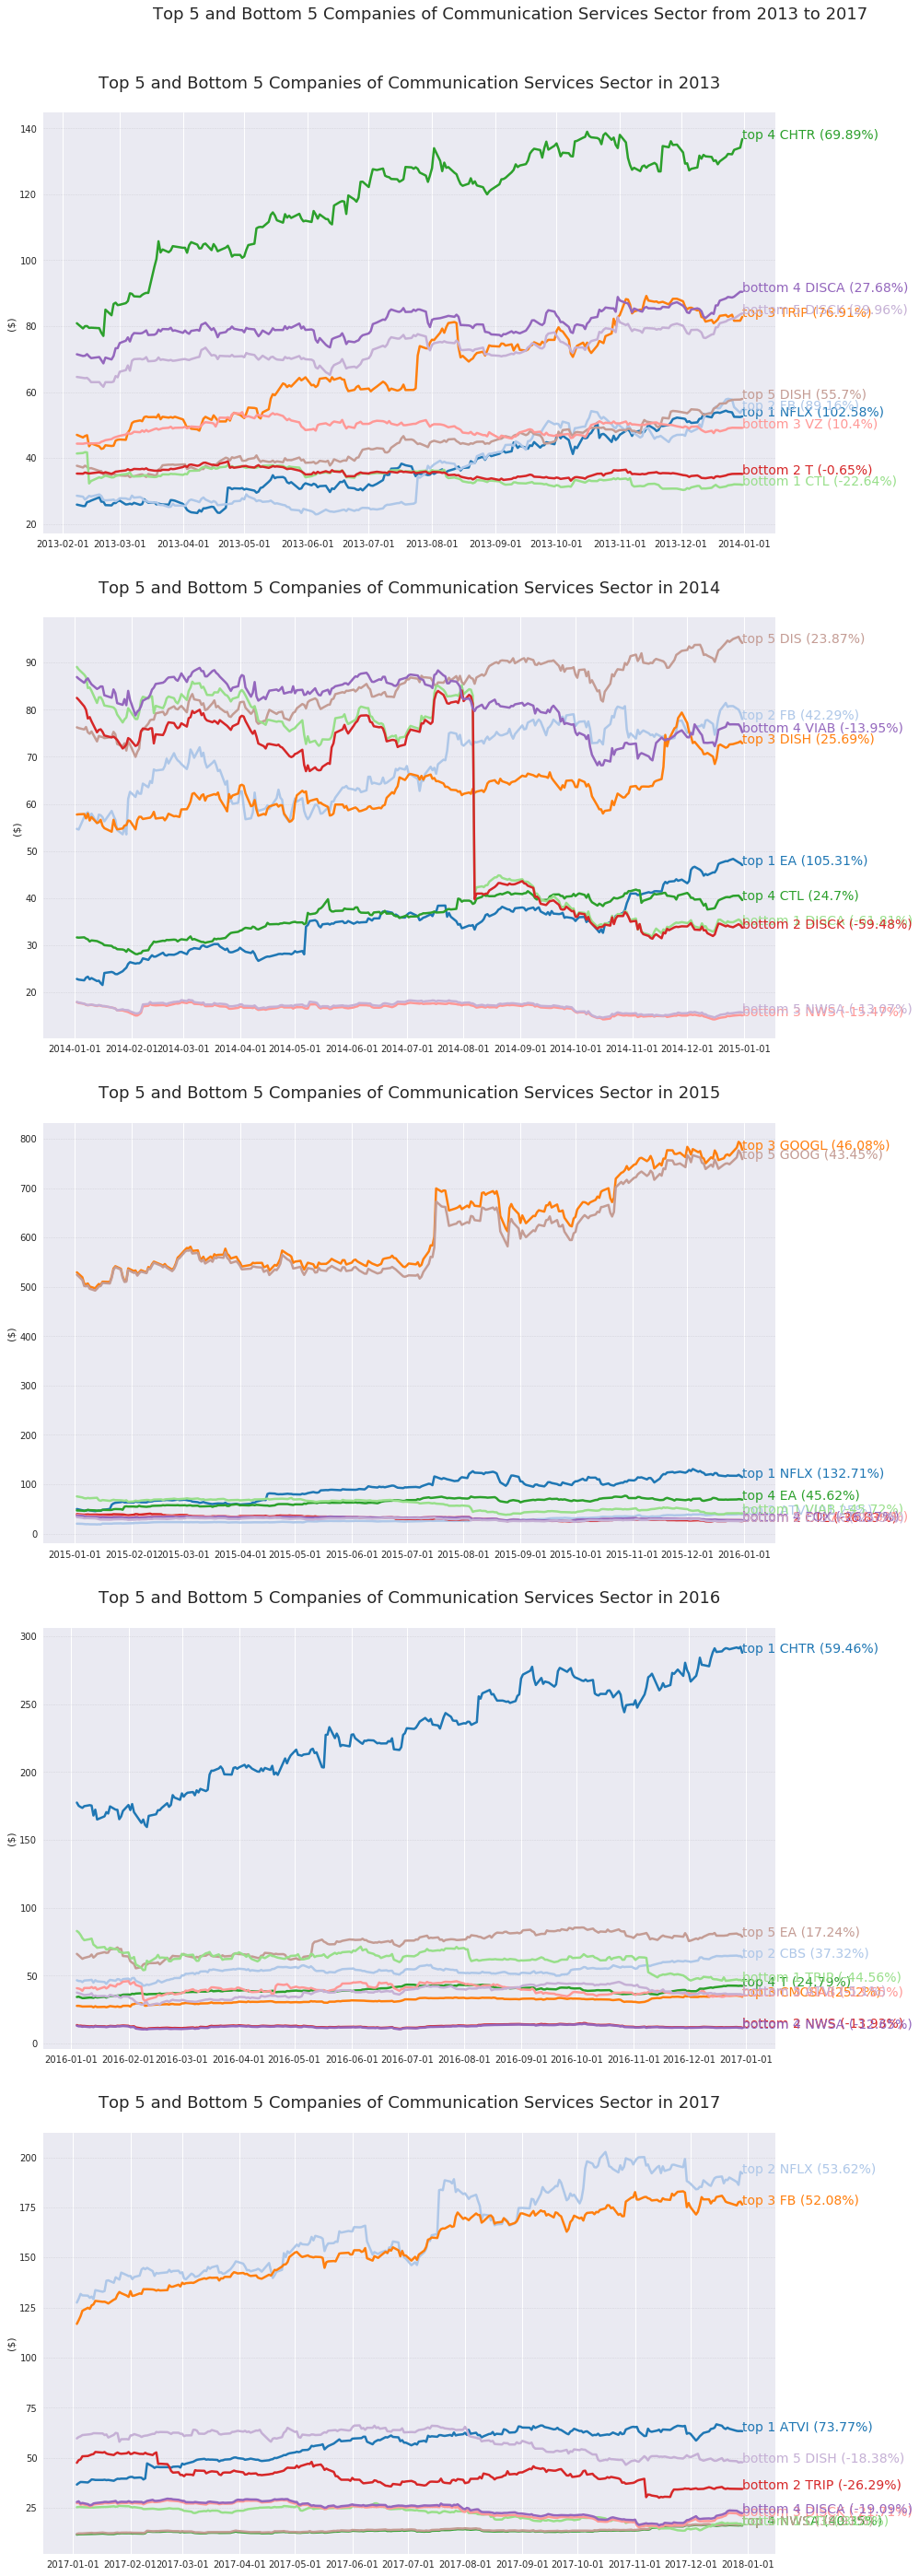

In [117]:
# top 5 most gain and top bottom most lost SP500 companies of Sector, Communication Services, 
# in 2013, 2014, 2015, 2016, and 2017 
secipt="Communication Services"
#fig, ax = plt.subplots(5, 1, figsize=(16, 12))
fig = plt.figure(figsize=(16, 40))
for (yipt,d) in startenddates.items():
    top5=getTop5ComNames(yipt,secipt)
    bottom5=getBottom5ComNames(yipt,secipt)
    topnbottom5=top5+bottom5
    yeardates=getDateList(yipt)
    ydts0=pd.DataFrame(yeardates)
    ydts0[0]=pd.to_datetime(ydts0[0],format='%Y-%m-%d')
    ydts1=list(ydts0[0])  
    i=0
    rank=0
    ax = fig.add_subplot(5,1,int(yipt)-2012)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    fig.subplots_adjust(left=.06, right=.75, bottom=.02, top=.94)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.set_title('Top 5 and Bottom 5 Companies of '+secipt+' Sector in '+yipt+'\n', fontsize=18, ha='center')
    plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.1)
    plt.tick_params(axis='both', which='both', bottom=True, top=False,
                    labelbottom=True, left=True, right=False, labelleft=True)
    plt.ylabel('($)')
    #topnbottom5=topnbottom5[0:2] # debug only
    for (idx0,nm) in enumerate(topnbottom5):
        c1=spstxdf["name"]==nm
        c2=spstxdf["dtyear"]==yipt
        yd1=spstxdf[c1 & c2]
        yd2=yd1["close"].tolist()    
        line = plt.plot(ydts1,
                        yd2,
                        lw=2.5,
                        color=color_sequence[i])
        y_pos = yd2[-1]
        x_pos= yeardates[len(yeardates)-1]
        pct1=getComYearlyChangesPct(yipt,nm)
        if idx0<5:
            lbl0 = "top "+str(rank+1)+" "+nm+" ("+str(pct1)+"%)"
        else:
            lbl0 = "bottom "+str(rank+1)+" "+nm+" ("+str(pct1)+"%)"
        plt.text(x_pos, y_pos, lbl0, fontsize=14, color=color_sequence[i])
        i+=1
        rank+=1
        if rank==5:
            rank=0
    fig.suptitle('Top 5 and Bottom 5 Companies of '+secipt+' Sector from 2013 to 2017', fontsize=18, ha='center')
plt.show()
fig.savefig('topNbtmComSrvEachYear.png')

In [118]:
import seaborn as sns
sns.set(style="darkgrid")
current_palette = sns.color_palette("bright")

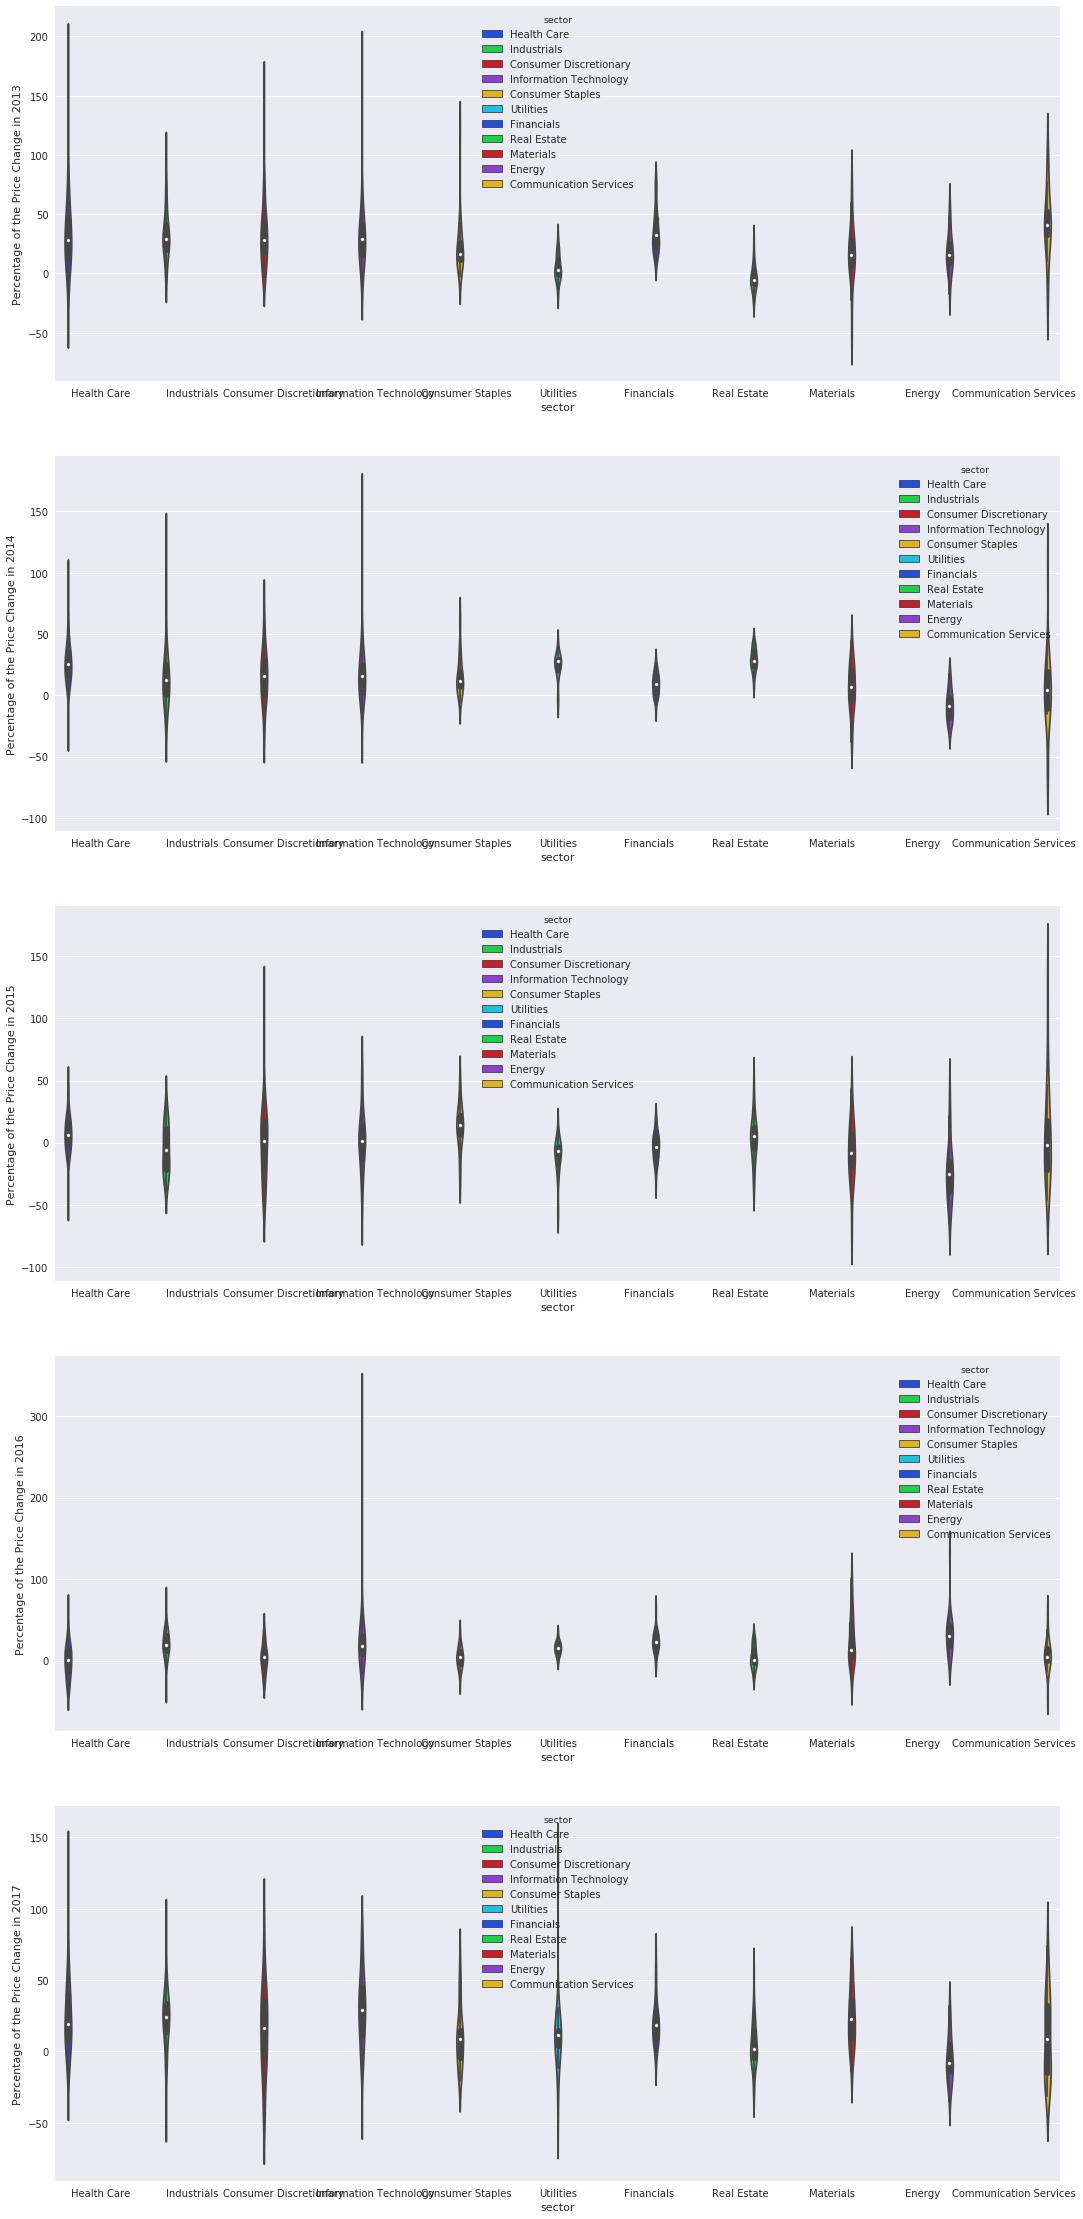

In [119]:
fig = plt.figure(figsize=(18, 40))
for (yipt,d) in startenddates.items():
    ax=fig.add_subplot(5,1,int(yipt)-2012)
    #fig.get_axes()[int(yipt)-2013].set_ylabel("Price Change Percentage in "+yipt)
    sns.violinplot(x="sector", y="pdiff"+yipt+"pct", hue="sector",data=spinfodf, palette="bright",ax=ax)
    ax.set(ylabel="Percentage of the Price Change in "+yipt)
plt.show()
fig.savefig('gainLostBySecEachYear.png')

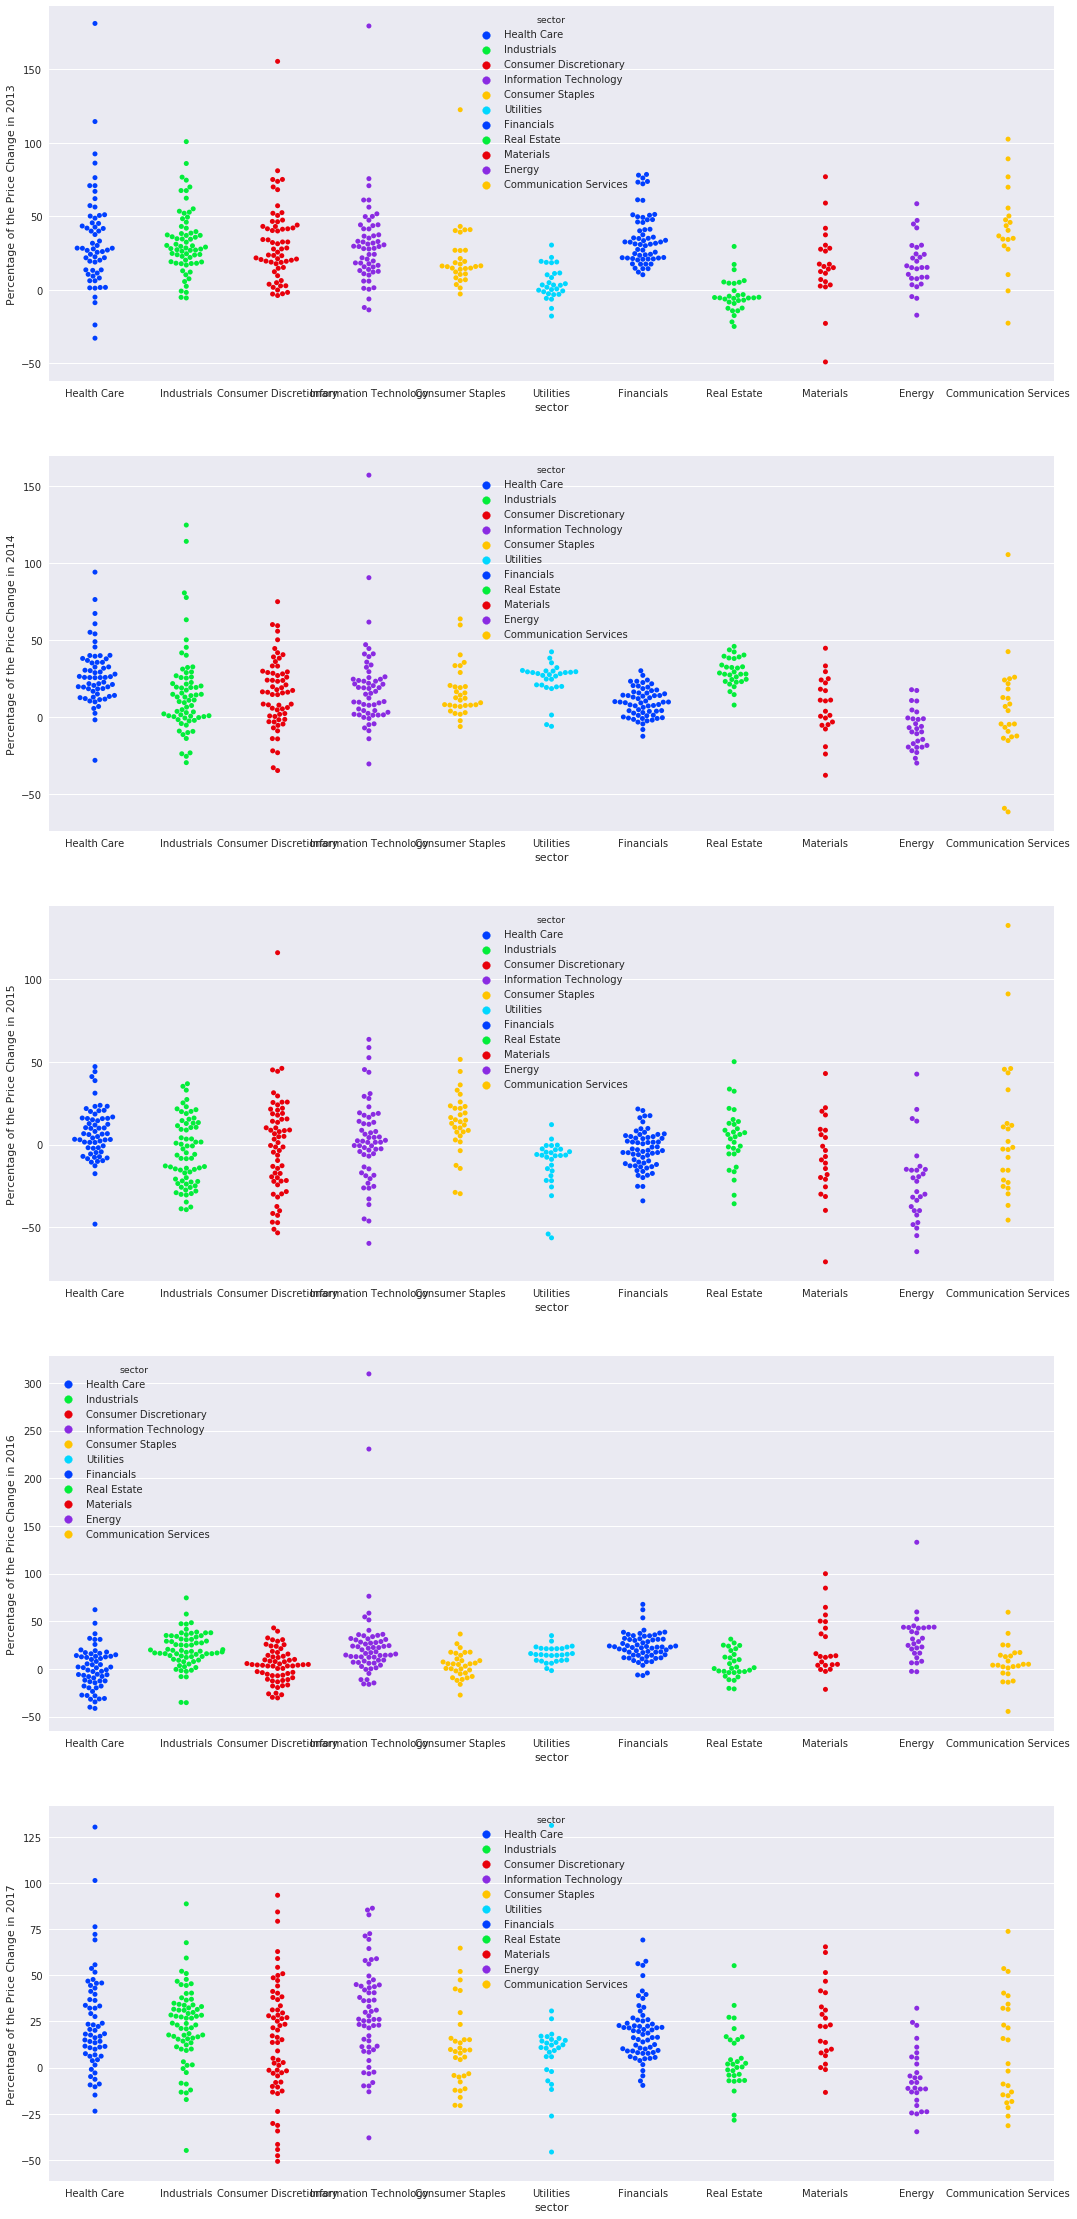

In [120]:
fig = plt.figure(figsize=(18, 40))
for (yipt,d) in startenddates.items():
    ax=fig.add_subplot(5,1,int(yipt)-2012)    
    sns.swarmplot(x="sector", y="pdiff"+yipt+"pct", hue="sector", data=spinfodf,palette="bright",ax=ax)
    ax.set(ylabel="Percentage of the Price Change in "+yipt)
plt.show()
fig.savefig('gainLostBySecEachYear-swarm.png')

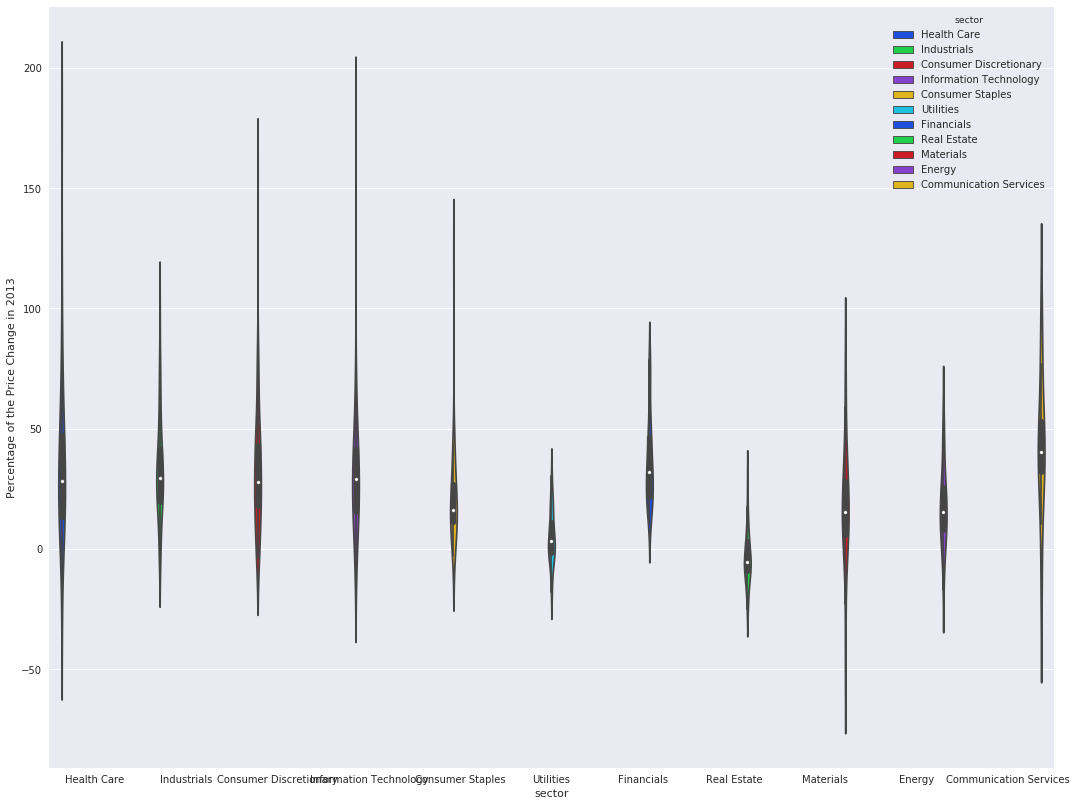

In [121]:
fig, ax = plt.subplots()
# the size of A4 paper 11.7, 8.27 (22,12) (16,12)
fig.set_size_inches(18, 14)
sns.violinplot(x="sector", y="pdiff2013pct", hue="sector",data=spinfodf, palette="bright",ax=ax)
ax.set(ylabel="Percentage of the Price Change in 2013")
plt.show()
fig.savefig('gainLostBySec2013.png')

In [122]:
#print(spinfo5YCdf.head())

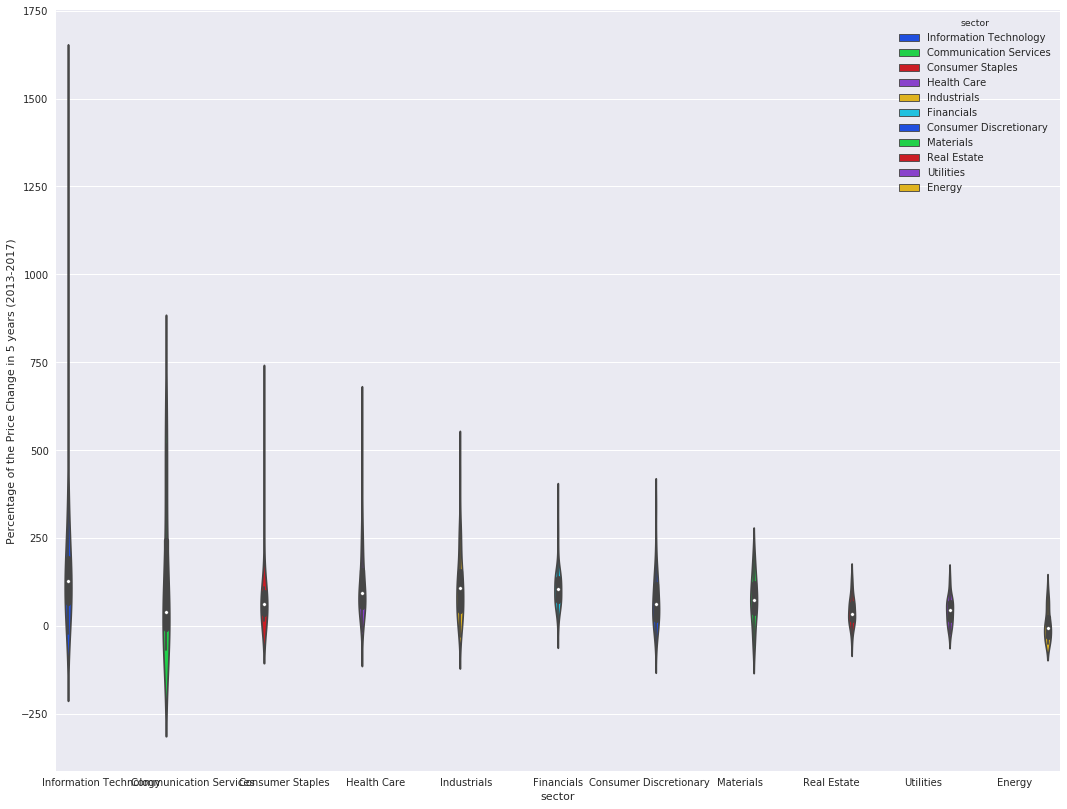

In [123]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 14)
sns.violinplot(x="sector", y="yc5pct", hue="sector",data=spinfo5YCdf, palette="bright",ax=ax)
ax.set(ylabel="Percentage of the Price Change in 5 years (2013-2017)")
plt.show()
fig.savefig('gainLostBySec5Yrs.png')

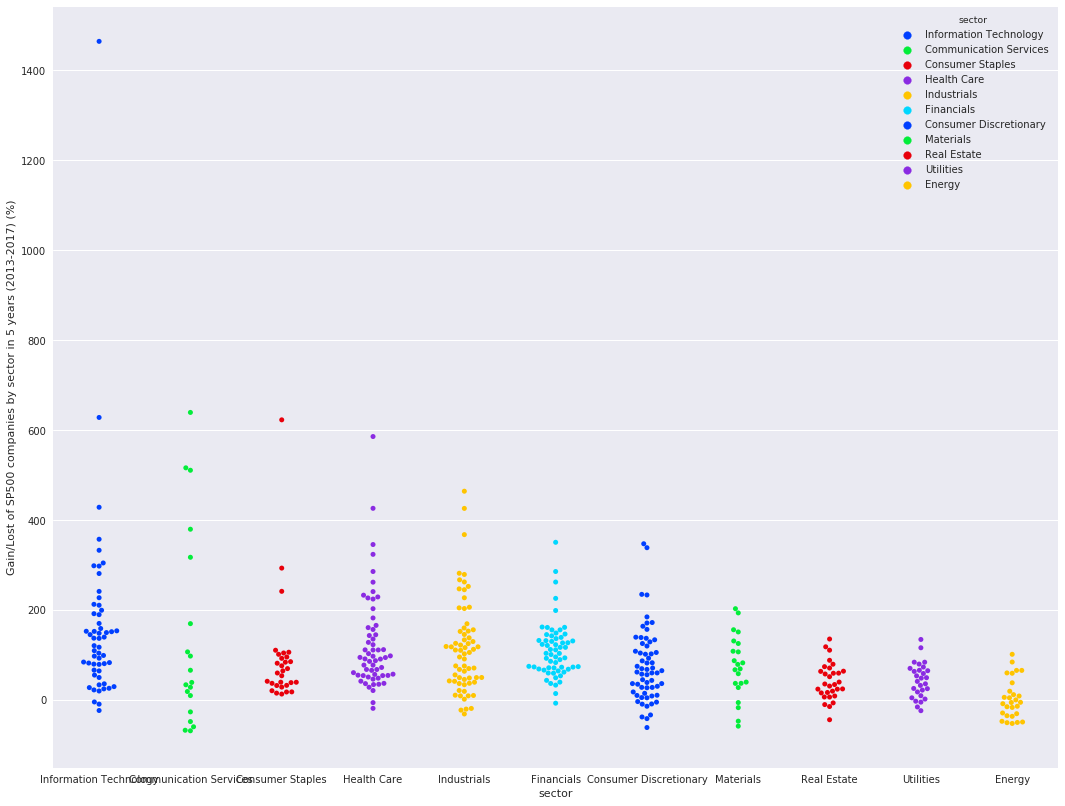

In [124]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 14)
#sns.violinplot(x="sector", y="yc5pct", hue="sector",data=spinfo5YCdf, palette="bright",ax=ax)
sns.swarmplot(x="sector", y="yc5pct", hue="sector", data=spinfo5YCdf,palette="bright",ax=ax)
ax.set(ylabel="Gain/Lost of SP500 companies by sector in 5 years (2013-2017) (%)")
plt.show()
fig.savefig('gainLostBySec5Yrs-swarm.png')

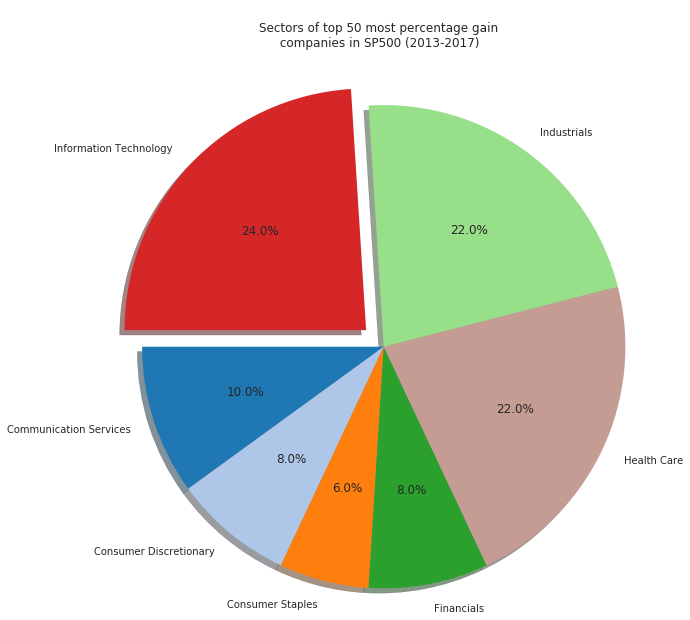

In [125]:
# Sectors of top 50 companies in SP500 in 5 years period (2013-2017)
# 11 secotrs, but only 7 sectors make it to the top 50 companies
numtop=50
tmp1=spinfo5YCdf.sort_values(["yc5pct"],ascending=[0]).head(numtop)
tmp2=tmp1.groupby("sector").count()
top50comSeclst=list(tmp2.index)
labels=top50comSeclst
tmp3=list(tmp2["name"])
top50comPctSeclst=[np.round((x*100)/numtop,0) for x in tmp3]
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
colors=color_sequence[0:7]
#print(colors)
#print(top50comSeclst)
#print(top50comPctSeclst)
explode = (0, 0, 0, 0, 0, 0, 0.1)
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(top50comPctSeclst, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("\nSectors of top 50 most percentage gain\n companies in SP500 (2013-2017)\n")
plt.show()
fig.savefig('gainLostBySec5Yrs-part2.png')

In [126]:
yd1=spinfo5YCdf[spinfo5YCdf["sector"]=="Health Care"].values[0][1:]
#print(yd1)
#print("@@@@@@@@@@")
yd2=spinfo5YCdf[spinfo5YCdf["sector"]=="Health Care"]["2013mktwvpct"].sum()
#print(yd2)
#print("====================")
#print(spinfo5YCdf.head(2))

In [127]:
hold1=spinfo5YCdf
mkt2013pct=[]
mkt2017pct=[]
for (i,x) in enumerate(lstsec):
    n0=hold1[hold1["sector"]==x]["2013mktwvpct"].sum()
    n2=hold1[hold1["sector"]==x]["2017mktwvpct"].sum()
    mkt2013pct.append(np.round(n0,2))
    mkt2017pct.append(np.round(n2,2))
#print(mkt2017pct)
#print(mkt2013pct)

In [128]:
mdlbls=[]
mdlbls=lstsec.copy()
for (i,x) in enumerate(mdlbls):
    n0=np.round(mkt2017pct[i]-mkt2013pct[i],1)
    # deal with round off issue later
    if i!=0 and i!=8:
        if i==4 or i==9 or i==10:
            n0+=0.1
        if n0>0:
            mdlbls[i]=mdlbls[i]+"\n(+"+str(n0)+"%)"
        else:
            mdlbls[i]=mdlbls[i]+"\n("+str(n0)+"%)"
    
#print(mdlbls)   

In [129]:
#print(lstsec)

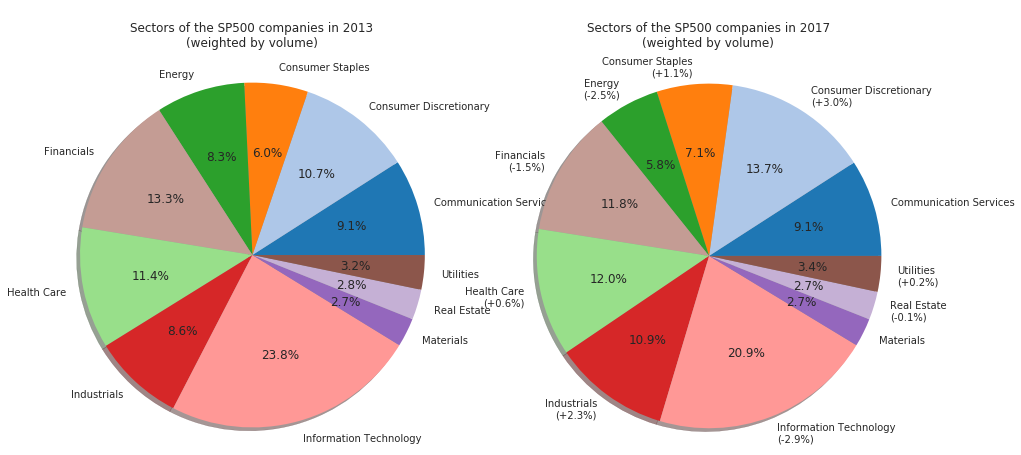

In [130]:
colors=color_sequence[0:len(lstsec)]
explode=np.zeros(len(lstsec))
fig=plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1,2,1)
ax.pie(mkt2013pct, explode=explode, labels=lstsec, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("\nSectors of the SP500 companies in 2013\n(weighted by volume)\n")
ax = fig.add_subplot(1,2,2)
ax.pie(mkt2017pct, explode=explode, labels=mdlbls, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("\nSectors of the SP500 companies in 2017\n(weighted by volume)\n")
plt.show()
fig.savefig('WtdSecDist2013vs2017.png')

In [131]:
yd4=secpctinfodf["y2013pct"]
#print(type(yd4))
yd5=secpctinfodf["y2013pct"].tolist()
#print(type(yd5))
#print(yd5)

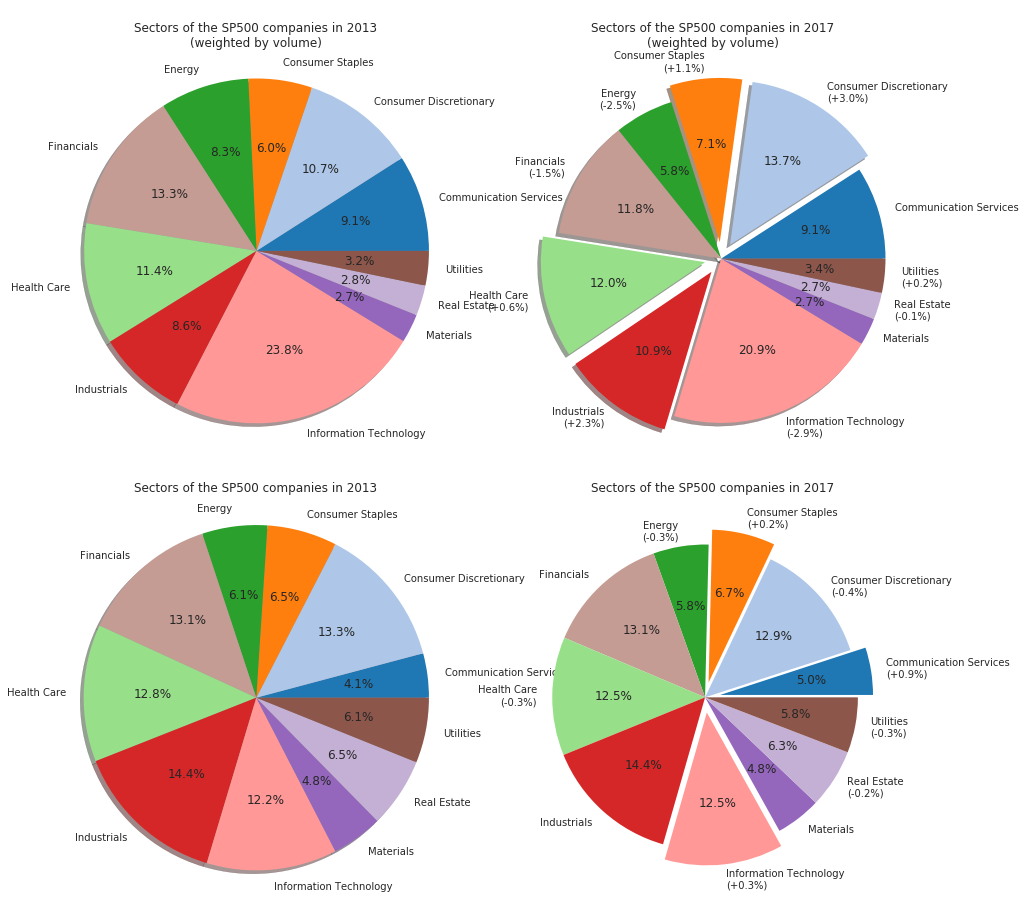

In [132]:
colors=color_sequence[0:len(lstsec)]
explode=np.zeros(len(lstsec))
fig=plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2,2,1)
ax.pie(mkt2013pct, explode=explode, labels=lstsec, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("\nSectors of the SP500 companies in 2013\n(weighted by volume)\n")
ax = fig.add_subplot(2,2,2)
expos=[0,0.1,0.1,0,0,0.1,0.1,0,0,0,0]
explode+=expos
ax.pie(mkt2017pct, explode=explode, labels=mdlbls, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("\nSectors of the SP500 companies in 2017\n(weighted by volume)\n")
lst13=secpctinfodf["y2013pct"].tolist()
lst17=secpctinfodf["y2017pct"].tolist()
mdlbls2=[]
mdlbls2=lstsec.copy()
numoffsets=[0,-0.1,0.1,-0.1,0,0,0,0,0,0.1,-0.1]
for (i,x) in enumerate(mdlbls):
    n0=np.round(np.round(lst17[i]-lst13[i],1)+numoffsets[i],1)
    if i!=4 and i!=6 and i!=8:            
        if n0>0:
            mdlbls2[i]=mdlbls2[i]+"\n(+"+str(n0)+"%)"
        else:
            mdlbls2[i]=mdlbls2[i]+"\n("+str(n0)+"%)"  
#print(mdlbls2)
explode=np.zeros(len(lstsec))
ax = fig.add_subplot(2,2,3)
ax.pie(lst13, explode=explode, labels=lstsec, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("\nSectors of the SP500 companies in 2013\n")
expos=[0.1,0,0.1,0,0,0,0,0.1,0,0,0]
explode+=expos
ax = fig.add_subplot(2,2,4)
ax.pie(lst17, explode=explode, labels=mdlbls2, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("\nSectors of the SP500 companies in 2017\n")
plt.show()
fig.savefig('WtdNcomSecDist2013vs2017.png')